In [5]:
import sys
sys.path.append('/mnt/archgen/users/yilei/IBDsim/downsample')
from plot_utility import calc_lengthBias_all, readMaskTrack
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

##########################  examining coverage cov5  #############################
bin: (5, 6)
pos mean: 1.565(1.392 - 1.738)
neg mean: 0.336(0.297 - 0.375)
proportion of positive overshoot: 0.472(0.439 - 0.506)
bin: (6, 8)
pos mean: 1.874(1.58 - 2.168)
neg mean: 0.388(0.361 - 0.415)
proportion of positive overshoot: 0.187(0.161 - 0.213)
bin: (8, 10)
pos mean: 0.004(0.001 - 0.007)
neg mean: 0.773(0.685 - 0.86)
proportion of positive overshoot: 0.018(0.006 - 0.031)
bin: (10, 15)
pos mean: 0.146(0.125 - 0.166)
neg mean: 0.952(0.851 - 1.052)
proportion of positive overshoot: 0.307(0.27 - 0.344)


/home/yilei_huang/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yilei_huang/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yilei_huang/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/yilei_huang/.local/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/yilei_huang/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


bin: (15, inf)
pos mean: nan(nan - nan)
neg mean: 1.046(0.873 - 1.219)
proportion of positive overshoot: 0.0(0.0 - 0.0)
bin: (6, inf)
pos mean: 0.936(0.773 - 1.098)
neg mean: 0.691(0.65 - 0.732)
proportion of positive overshoot: 0.168(0.152 - 0.184)
##########################  examining coverage cov2  #############################
bin: (5, 6)
pos mean: 1.452(1.285 - 1.618)
neg mean: 0.314(0.275 - 0.354)
proportion of positive overshoot: 0.539(0.508 - 0.57)
bin: (6, 8)
pos mean: 1.847(1.549 - 2.144)
neg mean: 0.27(0.256 - 0.285)
proportion of positive overshoot: 0.229(0.203 - 0.256)
bin: (8, 10)
pos mean: 0.002(0.001 - 0.002)
neg mean: 0.69(0.608 - 0.772)
proportion of positive overshoot: 0.031(0.015 - 0.047)
bin: (10, 15)
pos mean: 0.172(0.152 - 0.192)
neg mean: 0.702(0.622 - 0.781)
proportion of positive overshoot: 0.323(0.286 - 0.361)
bin: (15, inf)
pos mean: nan(nan - nan)
neg mean: 0.644(0.59 - 0.699)
proportion of positive overshoot: 0.0(0.0 - 0.0)
bin: (6, inf)
pos mean: 1.018(0.

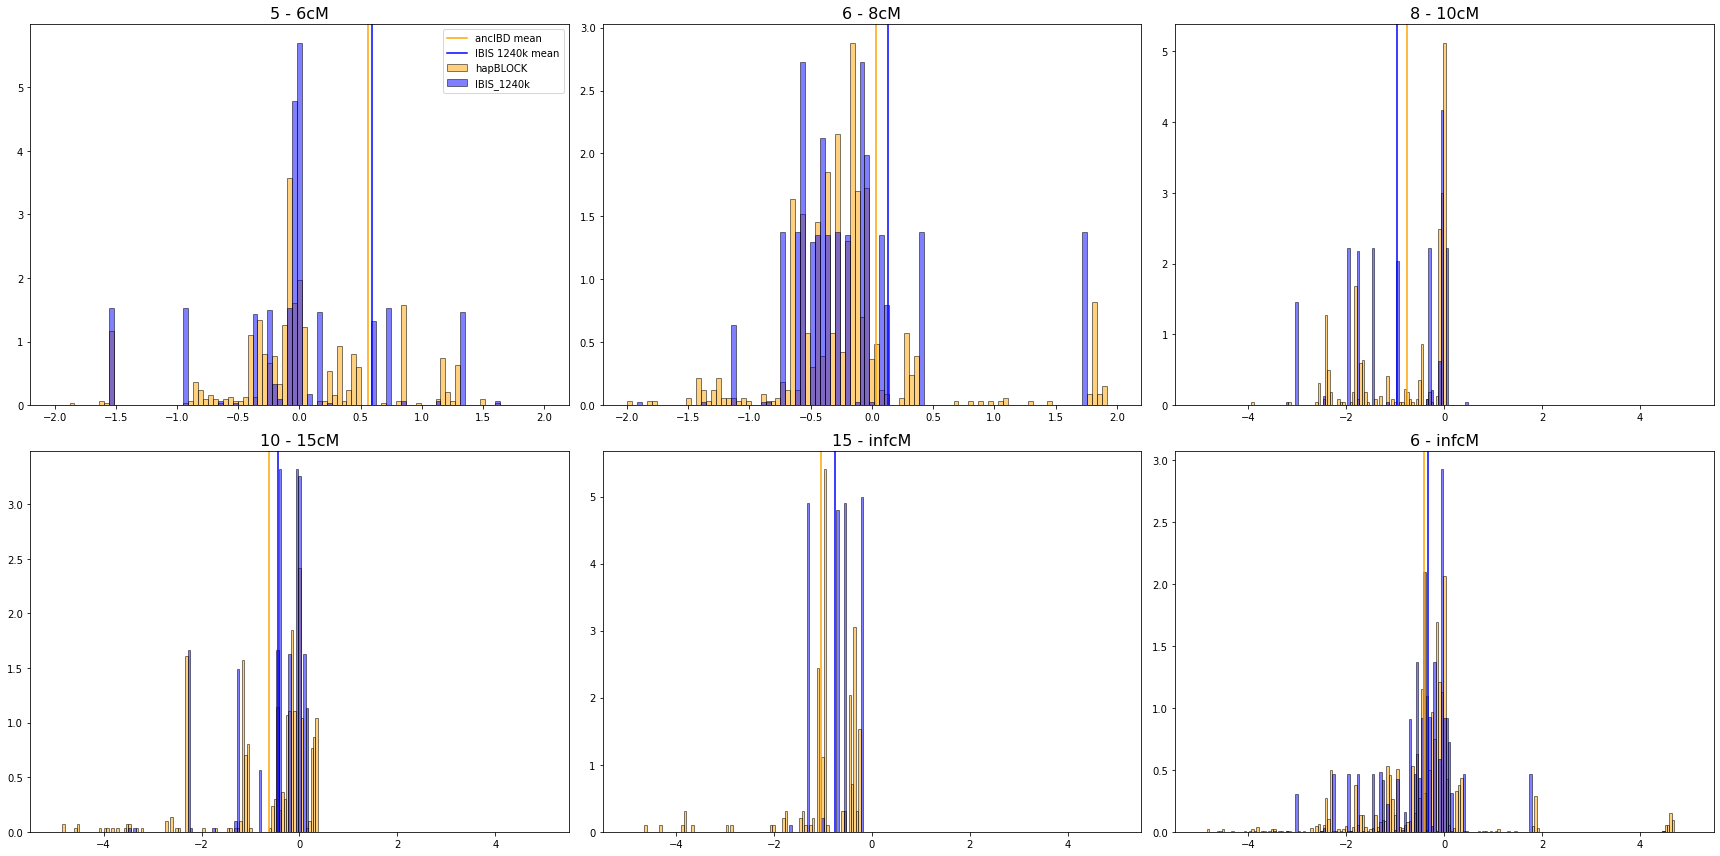

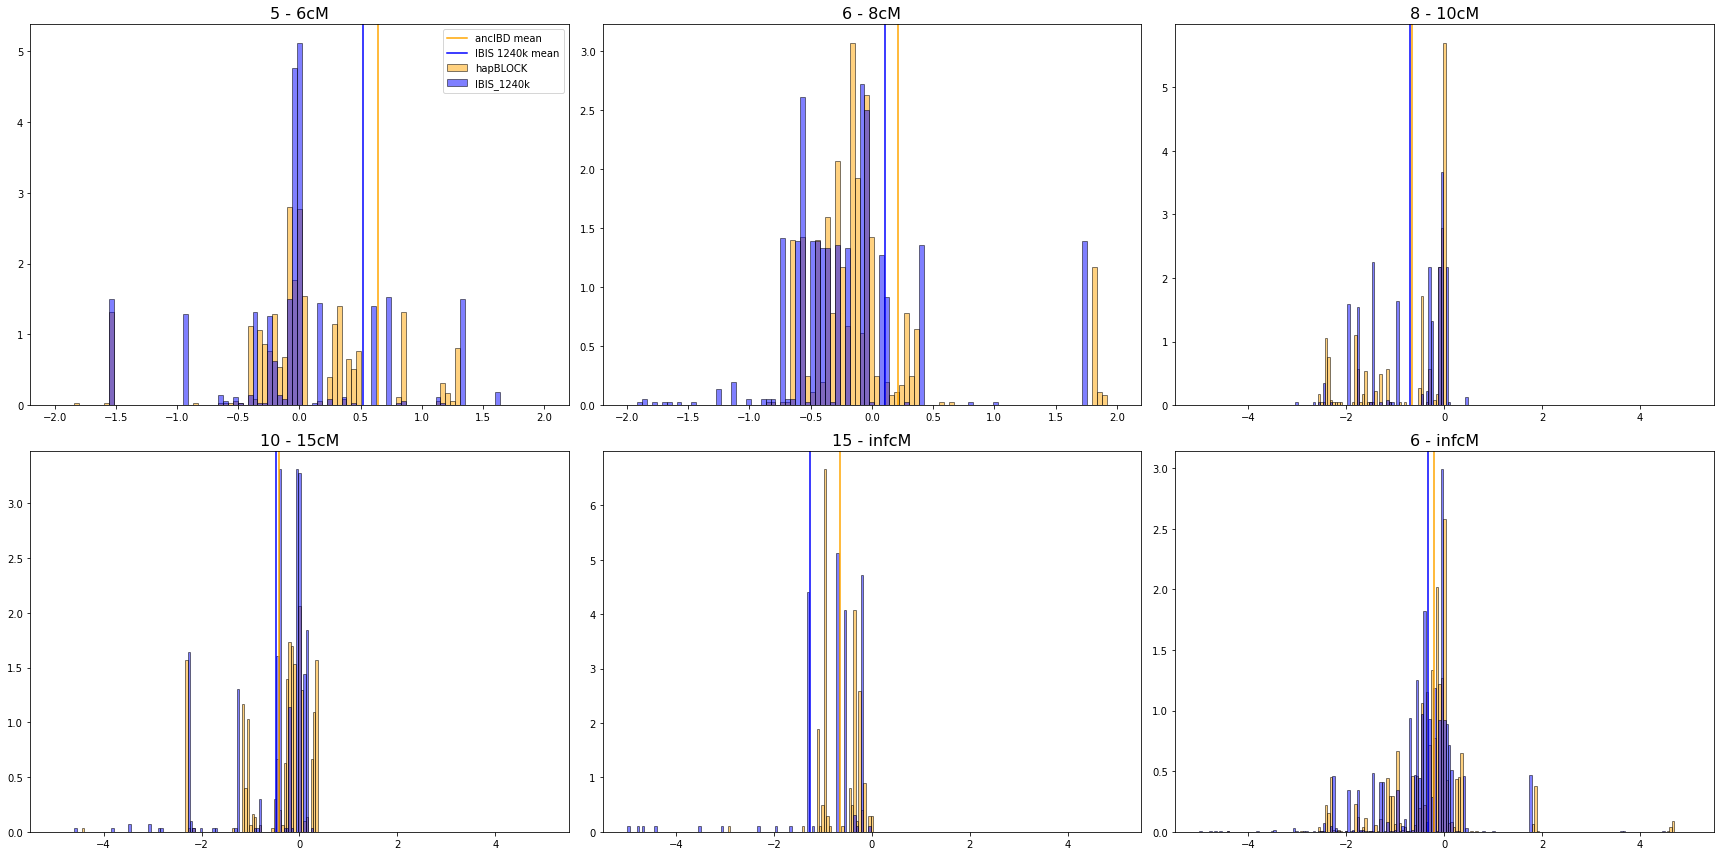

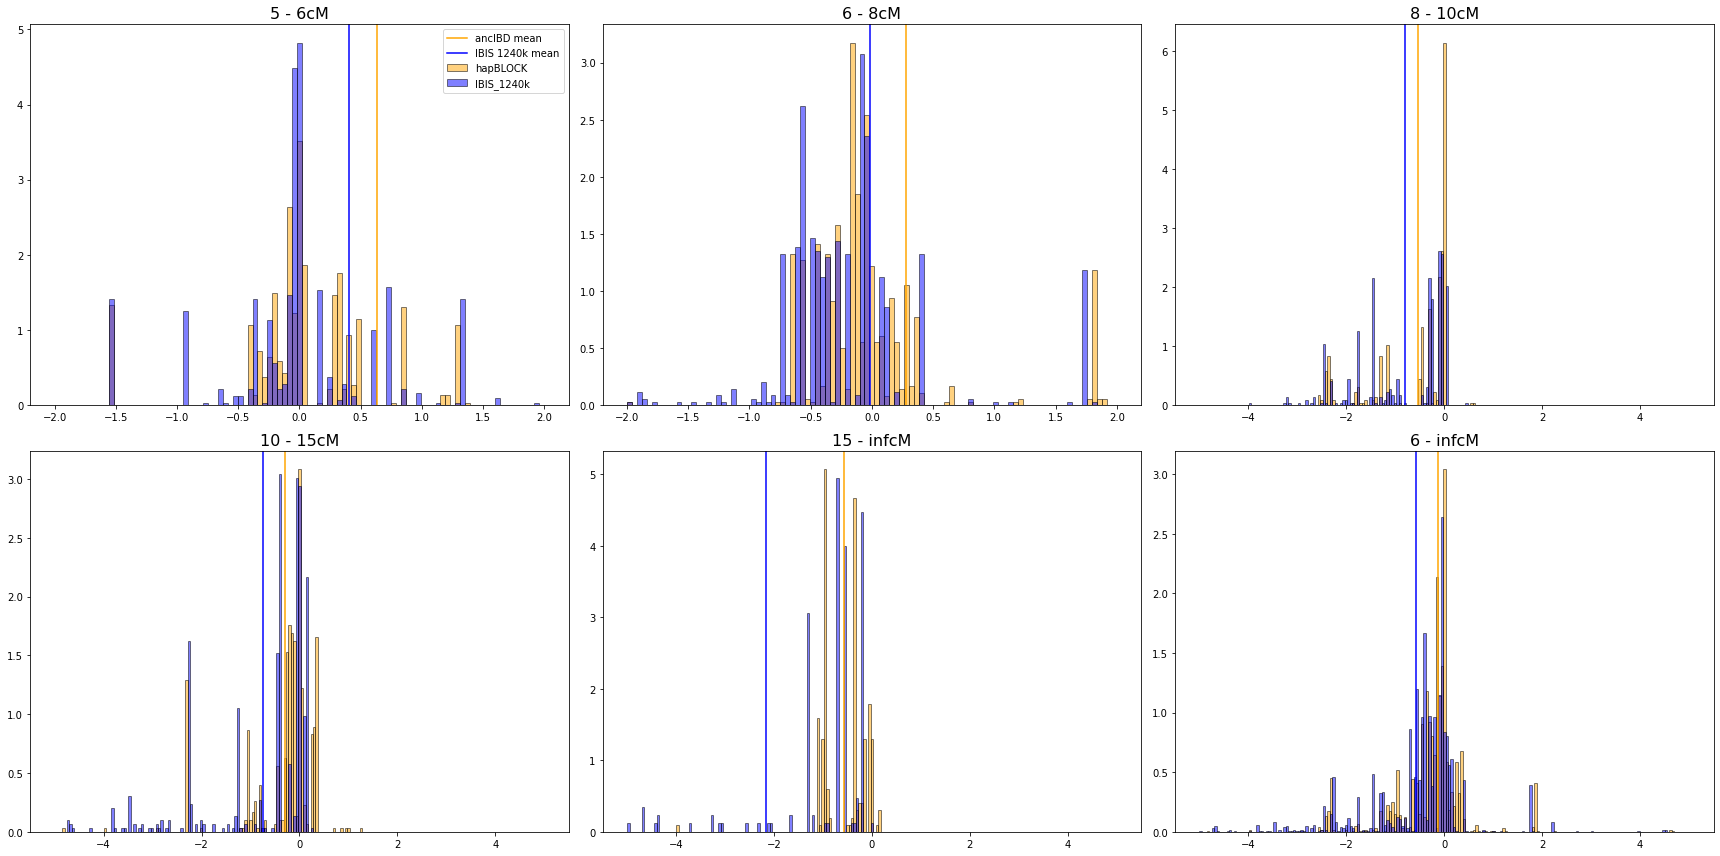

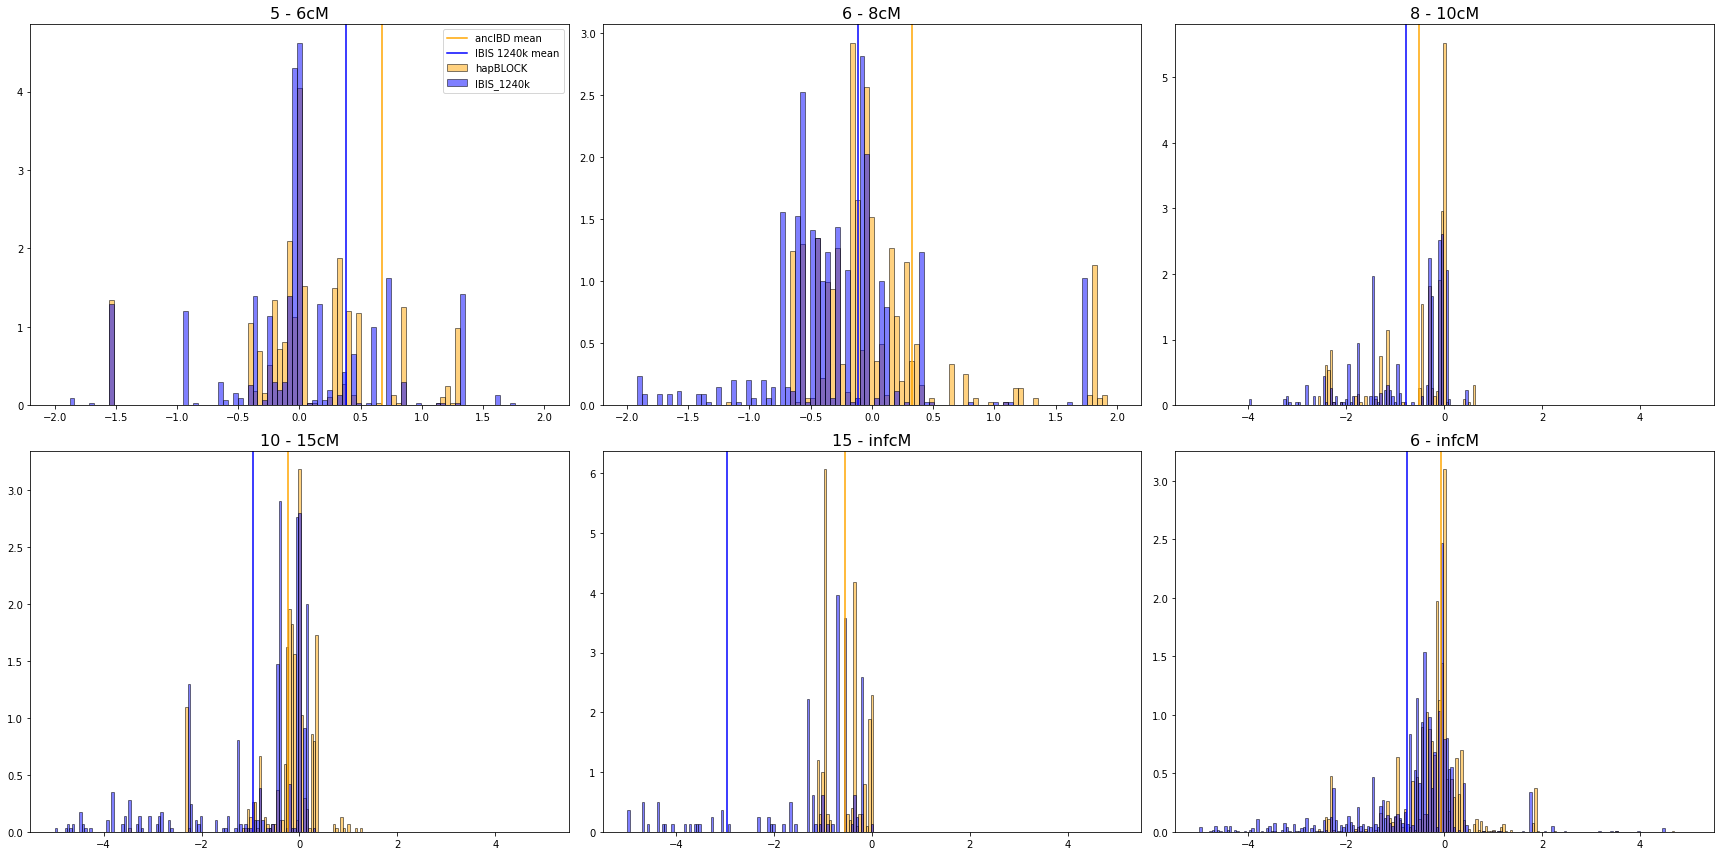

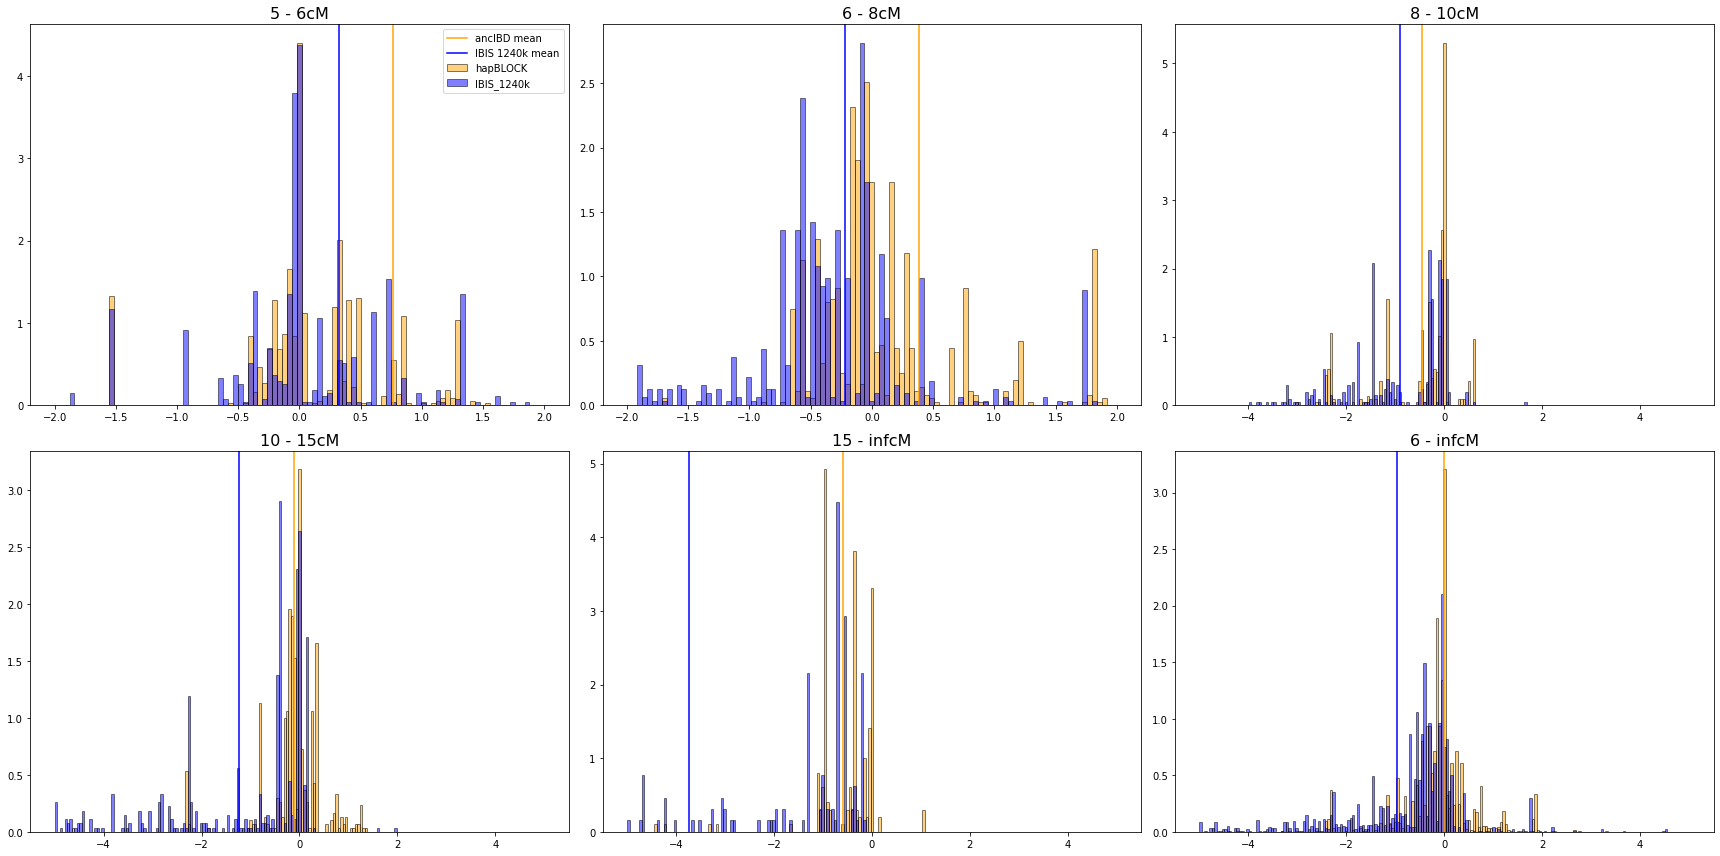

In [9]:
bins = [(5,6), (6,8), (8,10), (10,15), (15, np.inf), (6,np.inf)]
covs = ['cov5', 'cov2', 'cov1', 'cov3over4', 'cov1over2']


masks = readMaskTrack('/mnt/archgen/users/yilei/tools/hapBLOCK/empirical/v51_6cM/mask.track')
#masks = None

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_minDP20_wgs/merged.wgs.4cM_noFP_masked_lengthBias.seg'
#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_minDP20_wgs/merged.wgs.4cM_noFP_lengthBias.seg'

#path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.seg'
path2GroundTruth = '/mnt/archgen/users/yilei/IBDsim/groundtruth_IBD_glimpse_transversion/MAC0/merged.glimpse.GP99.transversion_only.masked.I2150.I3950.ch4.removed.seg'


for cov in covs:
    print(f'##########################  examining coverage {cov}  #############################')
    fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(24, 12), tight_layout=True)
    for index, bin in enumerate(bins):
        i, j = index//3, index%3
        if i == 0 and j <= 1:
            hist_bins = np.linspace(-2,2,100)
        else:
            hist_bins = np.linspace(-5,5,200)

        diffs = calc_lengthBias_all(path2GroundTruth, f'../../callIBD/{cov}', bin[0], bin[1], mode='hapBLOCK', masks=masks)
        diffs = np.array(diffs)
        pos = diffs[diffs > 0]
        pos_mu = np.mean(pos)
        pos_sem = stats.sem(pos)
        neg = np.abs(diffs[diffs < 0])
        neg_mu = np.mean(neg)
        neg_sem = stats.sem(neg)
        print(f'bin: {bin}')
        print(f'pos mean: {round(pos_mu,3)}({round(pos_mu-1.96*pos_sem,3)} - {round(pos_mu+1.96*pos_sem,3)})')
        print(f'neg mean: {round(neg_mu,3)}({round(neg_mu-1.96*neg_sem,3)} - {round(neg_mu+1.96*neg_sem,3)})')

        p = len(pos)/len(diffs)
        sd = np.sqrt(p*(1-p)/len(diffs))
        print(f'proportion of positive overshoot: {round(p,3)}({round(p-1.96*sd, 3)} - {round(p+1.96*sd, 3)})')
        # mu = np.mean(diffs)
        # sigma2 = np.sum(np.square(diffs-np.mean(diffs)))/len(diffs)
        # print(f'bin: {bin}')
        # print(f'mean: {mu}')
        # print(f'sigma: {np.sqrt(sigma2)}')

        axs[i,j].hist(diffs, label='hapBLOCK', alpha=0.5, ec='k', bins=hist_bins, color='orange', density=True)
        axs[i,j].axvline(x=np.mean(diffs), color='orange', zorder=2, label='ancIBD mean')

        ## plot gaussian fit to ancIBD's length bias
        # axs[i,j].plot(hist_bins, scipy.stats.norm.pdf(hist_bins, loc=np.mean(diffs), scale=np.sqrt(sigma2)), color='orange')

        diffs = calc_lengthBias_all(path2GroundTruth, f'../../callIBD/{cov}', bin[0], bin[1], mode='IBIS_1240k', masks=masks)
        axs[i,j].hist(diffs, label='IBIS_1240k', alpha=0.5, ec='k', bins=hist_bins, color='blue', density=True)
        axs[i,j].axvline(x=np.mean(diffs), color='blue', zorder=2, label='IBIS 1240k mean')

        axs[i,j].set_title(f'{bin[0]} - {bin[1]}cM', fontsize=16)
        if i == j == 0:
            axs[i,j].legend(loc='upper right')
    plt.savefig(f'{cov}_mask.png', dpi=300)

In [8]:
import scipy
diff1 = calc_lengthBias_all(f'../callIBD/cov1', 5, 10, mode='hapBLOCK')
diff2 = calc_lengthBias_all(f'../callIBD/cov1', 10, np.inf, mode='hapBLOCK')
scipy.stats.ks_2samp(diff1, diff2)

KstestResult(statistic=0.3525273461730487, pvalue=3.1316661977609357e-37)

In [10]:
data1 = np.random.normal(size=100)
data2 = np.random.normal(size=2500)
scipy.stats.ks_2samp(data1, data2)

KstestResult(statistic=0.0872, pvalue=0.435103187072532)

In [ ]:
diffs = calc_lengthBias_all(f'../callIBD/cov1', 15, np.inf, mode='IBIS_1240k')